In [16]:
# essentials
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import os

import tensorflow as tf

import config
from utils.DataGenerator import DataGenerator

## Loading models and vocabulary

In [17]:
model = tf.keras.models.load_model(config.NN_MODEL_DIR + "model-acc17-loss5.63.h5")

In [18]:
with open(os.path.join(config.NN_MODEL_DIR, "vocabulary.pkl"), 'rb') as file:
    vocabulary = pickle.load(file)

with open("models/word2vecs/whole-dataset-win7-vec200-min20.pkl", 'rb') as file:
    word2vec = pickle.load(file)

with open(os.path.join(config.NN_MODEL_DIR, "training_logs.pkl"), 'rb') as file:
    training_logs = pickle.load(file)


Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-04-24 13:40:08         3580
metadata.json                                  2023-04-24 13:40:08           64
variables.h5                                   2023-04-24 13:40:08     28680888
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...layers\dense_4
......vars
.........0
.........1
...layers\dropout
......vars
...layers\dropout_1
......vars
...metrics\mean
......vars
.........0
.........1
...metrics\mean_metric_wrapper
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.....

## Learning curve

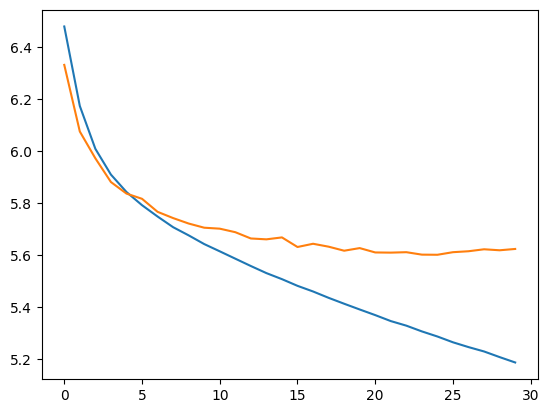

In [19]:
# due to early stopping executed epochs might be different
executed_epochs = len(training_logs.history["loss"])

plt.plot(range(executed_epochs), training_logs.history["loss"])
plt.plot(range(executed_epochs), training_logs.history["val_loss"])

## Evaluation 

In [20]:
reviews_df = pd.read_csv("data/reviews_cleaned_sample.csv", converters={'tokenized': pd.eval})

In [21]:
sample_index = 1

sample_reviews = reviews_df.tokenized.iloc[sample_index:sample_index+2]

In [22]:
data_gen = DataGenerator(sample_reviews, vocabulary=vocabulary)

In [23]:
X_words, y_words = data_gen.create_dataset(config.PREVIOUS_WORDS_CONSIDERED)
embedded_words = data_gen.vectorize(X_words, word2vec, input_size=config.INPUT_SIZE)

In [24]:
y_preds = model.predict(embedded_words, verbose=0)

num_proposed_words = 5
vocabulary_size = len(vocabulary)

In [25]:
pwc_and_predicted = []

for index in range(len(X_words)):
    y_pred = y_preds[index]

    predicted_indices = np.argsort(y_pred).reshape(vocabulary_size)[-num_proposed_words:]
    probabilities = np.sort(y_pred).reshape(vocabulary_size)[-num_proposed_words:]

    predicted_probability = {vocabulary[index]: prob for index, prob in zip(predicted_indices, probabilities)}
    
    pwc_and_predicted.append((X_words[index], y_words[index], predicted_probability))

In [27]:
pwc_and_predicted_sample = pwc_and_predicted[3:8]

for tokens, _, predicted_words in pwc_and_predicted_sample:
    text = " ".join(tokens)

    print(text + "...")
    print("PREDICTED:")

    for word, probability in predicted_words.items():
        print("       {: >20}: {}%".format(word, int(probability*100)))

    print()

of the general...
PREDICTED:
                      films: 45%
                         in: 51%
                        the: 53%
                         of: 62%
                        and: 75%

the general public...
PREDICTED:
                         is: 72%
                         in: 74%
                         to: 77%
                         of: 79%
                        and: 82%

general public actually...
PREDICTED:
                         is: 55%
                          i: 55%
                          a: 65%
                         as: 67%
                        the: 72%

public actually more...
PREDICTED:
                  realistic: 33%
                      about: 39%
                  important: 40%
                interesting: 56%
                       than: 92%

actually more important...
PREDICTED:
                      films: 44%
                        but: 51%
                         to: 53%
                        and: 75%
                       than: 90